In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from zipfile import ZipFile

In [2]:
#setting the current working directory 
os.getcwd()
#changes the current working directory of the calling process to the directory specified in path.
os.chdir('/Users/maneeshaprasad/Downloads/archive/Meta')
#returns current working directory of a process
os.getcwd()

'/Users/maneeshaprasad/Downloads/archive/Meta'

In [3]:
#Loading the data
Images_data = [] #Loading Images to Images_data List
Images_labels = [] #Loading labels to Images_labels List
classes = 43 #Classes

for i in range(classes): #Looping all the classes 
    path = os.path.join('/Users/maneeshaprasad/Downloads/archive/Train',str(i))
    images = os.listdir(path)
    for a in images:#Looping through all the images
        image = Image.open(path + '/' + a)  
        image = image.resize((32,32)) #Resizing the images
        image = np.array(image)
        Images_data.append(image) #Appending all the images to Images_data list
        Images_labels.append(i) #Appending all the labels to Image_labels list

Images_data = np.array(Images_data) #list to arrays
Images_labels = np.array(Images_labels) #list to arrays


In [4]:
#printing the size of data and labels
print('Size of Images : ' ,Images_data.shape)
print('SIze of Labels : ' ,Images_labels.shape)

Size of Images :  (39209, 32, 32, 3)
SIze of Labels :  (39209,)


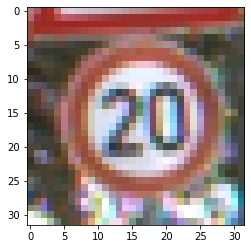

In [5]:
#display the first image in the training data
plt.imshow(Images_data[105,:,:],cmap='gray')
plt.show()

In [6]:
#Splitting the data into train and test
train_images,test_images,train_labels,test_labels = train_test_split(Images_data,Images_labels,test_size=0.2,random_state = 42)

In [7]:
#printing the size of train and test data
print('train_images size : ' ,train_images.shape)
print('train_labels size : ' ,train_labels.shape)
print('test_images size :  ' ,test_images.shape)
print('test_labels size :  ' ,test_labels.shape)

train_images size :  (31367, 32, 32, 3)
train_labels size :  (31367,)
test_images size :   (7842, 32, 32, 3)
test_labels size :   (7842,)


In [8]:
#change the labels from integer to one-hot encoding
train_labels = to_categorical(train_labels,43)
test_labels = to_categorical(test_labels,43)

In [9]:
#Building the model
model = Sequential()
#hidden layer using activation relu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2))) #Adding extra hidden layers
model.add(Dropout(rate=0.25)) #Dropout frequency
#Flattening the model
model.add(Flatten())
model.add(Dense(256, activation='relu')) #more layers
model.add(Dropout(rate=0.5))#Dropout frequency
model.add(Dense(43, activation='softmax')) #out layer

2021-12-12 16:41:42.995463: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#Compilation 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#Fitting or passing the data to the model
history = model.fit(train_images, train_labels, batch_size=256, epochs=5, verbose=1,validation_data=(test_images, test_labels))

Epoch 1/5
123/123 [==============================] - 29s 220ms/step - loss: 7.2537 - accuracy: 0.3973 - val_loss: 0.8406 - val_accuracy: 0.7930
Epoch 2/5
123/123 [==============================] - 24s 199ms/step - loss: 1.1172 - accuracy: 0.7227 - val_loss: 0.5108 - val_accuracy: 0.8800
Epoch 3/5
123/123 [==============================] - 24s 197ms/step - loss: 0.7411 - accuracy: 0.8205 - val_loss: 0.3364 - val_accuracy: 0.9171
Epoch 4/5
123/123 [==============================] - 24s 198ms/step - loss: 0.6191 - accuracy: 0.8584 - val_loss: 0.2300 - val_accuracy: 0.9512
Epoch 5/5
123/123 [==============================] - 24s 198ms/step - loss: 0.5270 - accuracy: 0.8813 - val_loss: 0.2123 - val_accuracy: 0.9561


In [11]:
#Evaluating the model
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc)) #Printing the accuracy

246/246 [==============================] - 2s 9ms/step - loss: 0.2123 - accuracy: 0.9561
Evaluation result on Test Data : Loss = 0.2122698724269867, accuracy = 0.9561336636543274


In [12]:
#Adding more dense layers
model = Sequential()
#hidden layer using activation relu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_images.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) #adding more layers
model.add(MaxPooling2D(pool_size=(2, 2))) #adding more layers
model.add(Dropout(rate=0.25))#Dropout frequency
#Adding more Conv2D, Maxpooling, Dense layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #adding more layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #adding more layers
model.add(MaxPooling2D(pool_size=(2, 2))) #adding more layers
model.add(Dropout(rate=0.25))#Dropout frequency
#Flattening the model
model.add(Flatten())
model.add(Dense(256, activation='relu')) #adding more layers
model.add(Dropout(rate=0.5))#Dropout frequency
model.add(Dense(43, activation='softmax')) #out layer

In [13]:
#Compilation 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#Fitting or passing the data to the model
history = model.fit(train_images, train_labels, batch_size=256, epochs=5, verbose=1,validation_data=(test_images, test_labels))

Epoch 1/5
123/123 [==============================] - 122s 980ms/step - loss: 2.9949 - accuracy: 0.3601 - val_loss: 0.6611 - val_accuracy: 0.8405
Epoch 2/5
123/123 [==============================] - 111s 902ms/step - loss: 0.6930 - accuracy: 0.8138 - val_loss: 0.1627 - val_accuracy: 0.9639
Epoch 3/5
123/123 [==============================] - 115s 931ms/step - loss: 0.3352 - accuracy: 0.9128 - val_loss: 0.1035 - val_accuracy: 0.9792
Epoch 4/5
123/123 [==============================] - 125s 1s/step - loss: 0.2248 - accuracy: 0.9442 - val_loss: 0.0807 - val_accuracy: 0.9810
Epoch 5/5
123/123 [==============================] - 121s 981ms/step - loss: 0.1715 - accuracy: 0.9579 - val_loss: 0.0745 - val_accuracy: 0.9821


In [15]:
#Listing all the data in history (Call Backs)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


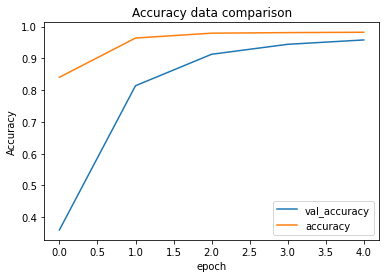

In [16]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['val_accuracy', 'accuracy'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

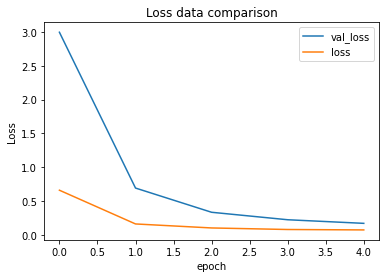

In [17]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [18]:
model.save('/Users/maneeshaprasad/Desktop/traffic_sign_board_detector.h5')#saving the model
print(model.summary()) #summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [29]:
#Importing the libraries for building GUI
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tkinter import *
from PIL import ImageTk, Image
from keras.models import load_model

In [71]:
#Reloading the model
model = load_model('traffic_sign_board_detector.h5')

In [72]:
#By using the CSV file done labelling for all traffic signs
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing vehicle > 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [73]:
#https://realpython.com/python-gui-tkinter/
#create a new window and assign it to the variable window
window=Tk()

window.geometry('800x600')
#Create a title widget with the text
window.title('Traffic sign board detector')
window.configure(background='#b7a6ad')
label=Label(window,background='#b7a6ad', font=('arial',15,'bold'))
sign_image = Label(window)


In [74]:
#prediction_function : By using this function we can pass the uploaded image to model and model will predict the image.

def prediction(file_path):
    global label_packed
    sign_board = Image.open(file_path) #Opening the random image from test data
    sign_board = sign_board.resize((32,32)) #Reshaping the size of image
    sign_board = np.expand_dims(sign_board, axis=0) #Expanding the dimensions
    sign_board = np.array(sign_board)
    pred = model.predict(sign_board) #Predecting the traffic sign using the model built above
    sign = classes[np.argmax(pred)+1]
    print(sign) #Printing the traffic sign what model has predected
    label.configure(foreground='yellow', text=sign) #adding some color configuration 

In [75]:
#display_prediction : By using this function we will display the prediction button after uploding the image

def display_prediction(file_path):
    classification=Button(window,text="Predict", command=lambda: prediction(file_path),padx=10,pady=5) #predicting the imag
    classification.configure(background='#466df0',foreground='black',font=('arial',10,'bold'))
    classification.place(relx=0.79,rely=0.46)

In [76]:
#Upload_Button : By using this function will request for uploading an image

def upload_sign_board():
    try:
       
        
        path= askopenfilename(filetypes=[("Jpg File",'.jpg'),('PNG Files','*.png')])
        im = Image.open(path)
        #im.thumbnail(((window.winfo_width()/2.25),(window.winfo_height()/2.25)))
        resize_img=im.resize((180,180))        
        tkimage = ImageTk.PhotoImage(resize_img)
        myvar=Label(window,image = tkimage)
        myvar.image=tkimage
        myvar.pack()
        label.configure(text='')
        display_prediction(path)     #Displaying the prediction
    except:
        pass
    
    
    
    
    
    




In [77]:
#Uplolading the image and classifying the type of image
upload=Button(window,text="Upload an image",command=upload_sign_board,padx=10,pady=5
             )  #Button configuration
upload.configure(background='#466df0', foreground='Black',font=('calibri',10,'bold')) 
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True) #Button location
label.pack(side=BOTTOM,expand=True)
#styling the text
heading = Label(window, text="Predict the traffic sign",pady=20, font=('calibri',20,'bold'))
heading.configure(background='#b7a6ad', foreground='white')
#adding all widgets to the window using pack()
heading.pack()


In [78]:
#this method listens for events, such as button clicks or keypresses
window.mainloop()

Dangerous curve left
